# Purity

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs

In [3]:
def purity_score(y_true, y_pred):
    k = np.unique(y_pred).shape[0]
    counts = metrics.cluster.contingency_matrix(y_true, y_pred)
    purity = (1/k)*np.sum(np.amax(counts, axis=0)/np.sum(counts, axis=0))
    return purity

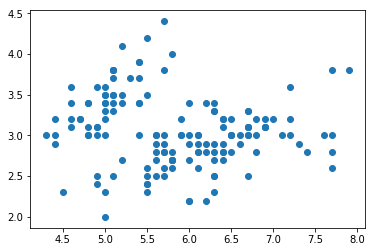

In [4]:
iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target

plt.scatter(x[:, 0], x[:, 1], cmap=plt.cm.brg)
plt.show()

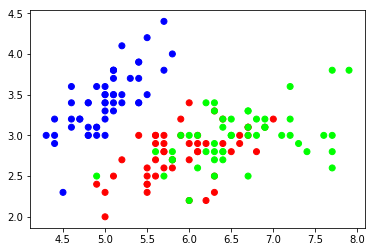

In [5]:
iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.brg)
plt.show()

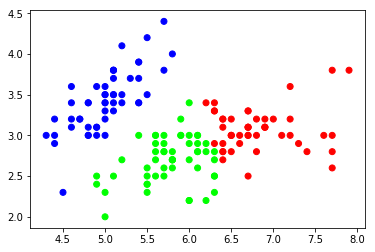

0.8205539943797671


In [6]:
estimator = KMeans(n_clusters=3)
y_pred = estimator.fit_predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=plt.cm.brg)
plt.show()

print(purity_score(y,y_pred))

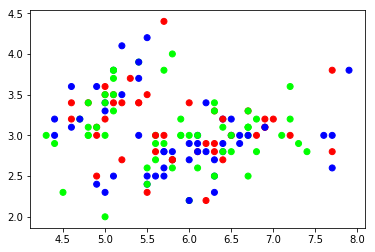

0.38686947647275965


In [7]:
y_pred = np.random.choice([0,1,2],size=y.shape)
plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=plt.cm.brg)
plt.show()
print(purity_score(y,y_pred))

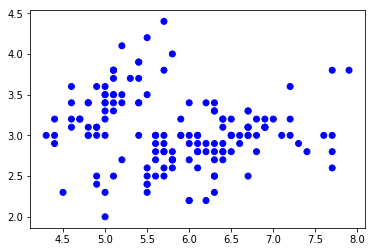

0.3333333333333333


In [8]:
y_pred = np.zeros(y.shape)
plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=plt.cm.brg)
plt.show()
print(purity_score(y,y_pred))

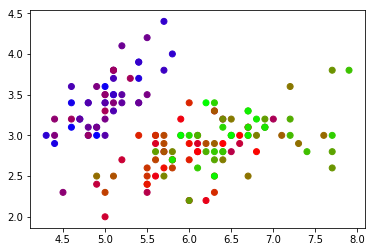

1.0


In [9]:
y_pred = np.arange(y.shape[0])
plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=plt.cm.brg)
plt.show()
print(purity_score(y,y_pred))

## Finding the number of clusters

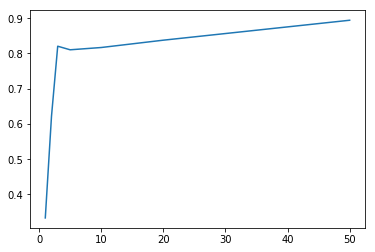

In [17]:
purities = []
k_values = [1,2,3,5,10,20,50]
for k in k_values:
    estimator = KMeans(n_clusters=k)
    y_pred = estimator.fit_predict(x)
    purities.append(purity_score(y,y_pred))

plt.plot(k_values,purities)
plt.show()